# 取出raw data

In [1]:
import xlrd
import matplotlib.pyplot as plt

In [2]:
MRSA_data = xlrd.open_workbook('MRSA_results.xlsx')
Tri_data  = xlrd.open_workbook('Trichomonas_results.xlsx')

algo_order = ['XGB', 'LR', 'SVM', 'RF', 'NN1', 'kNN', 'NN5']
algo_order_i = [4,0,2,3,5,1,6]
# algo_order = ['LR', 'kNN', 'SVM', 'RF', 'XGB', 'NN1', 'NN5']
# algo_order_i = [0,1,2,3,4,5,6]

## Time

- XLRD一切為0-index!!!
- MRSA:

In [4]:
MRSA_pack = []
sheet_n = 1
for column_n in range(2,16,2):
    table = MRSA_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101) & (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    MRSA_pack.append(raw_data)

 - Trichomonas:

In [5]:
Tri_pack = []
sheet_n = 1
for column_n in range(2,16,2):
    table = Tri_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101)& (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    Tri_pack.append(raw_data)

In [6]:
z = list( zip(MRSA_pack, Tri_pack) )

# Normal: original color

XGB in MRSA: 0.47 (0.47-0.47)
XGB in Tri:  0.39181 (0.39-0.4)
LR in MRSA: 0.47021 (0.47-0.47)
LR in Tri:  0.45765 (0.45-0.46)
SVM in MRSA: 0.89837 (0.89-0.92)
SVM in Tri:  0.49153 (0.46-0.49)
RF in MRSA: 0.84743 (0.82-0.87)
RF in Tri:  0.97435 (0.95-0.99)
NN1 in MRSA: 0.4671 (0.46-0.47)
NN1 in Tri:  0.39734 (0.39-0.45)
kNN in MRSA: 0.54681 (0.55-0.59)
kNN in Tri:  0.54473 (0.53-0.55)
NN5 in MRSA: 0.65807 (0.64-0.67)
NN5 in Tri:  0.4761 (0.47-0.51)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

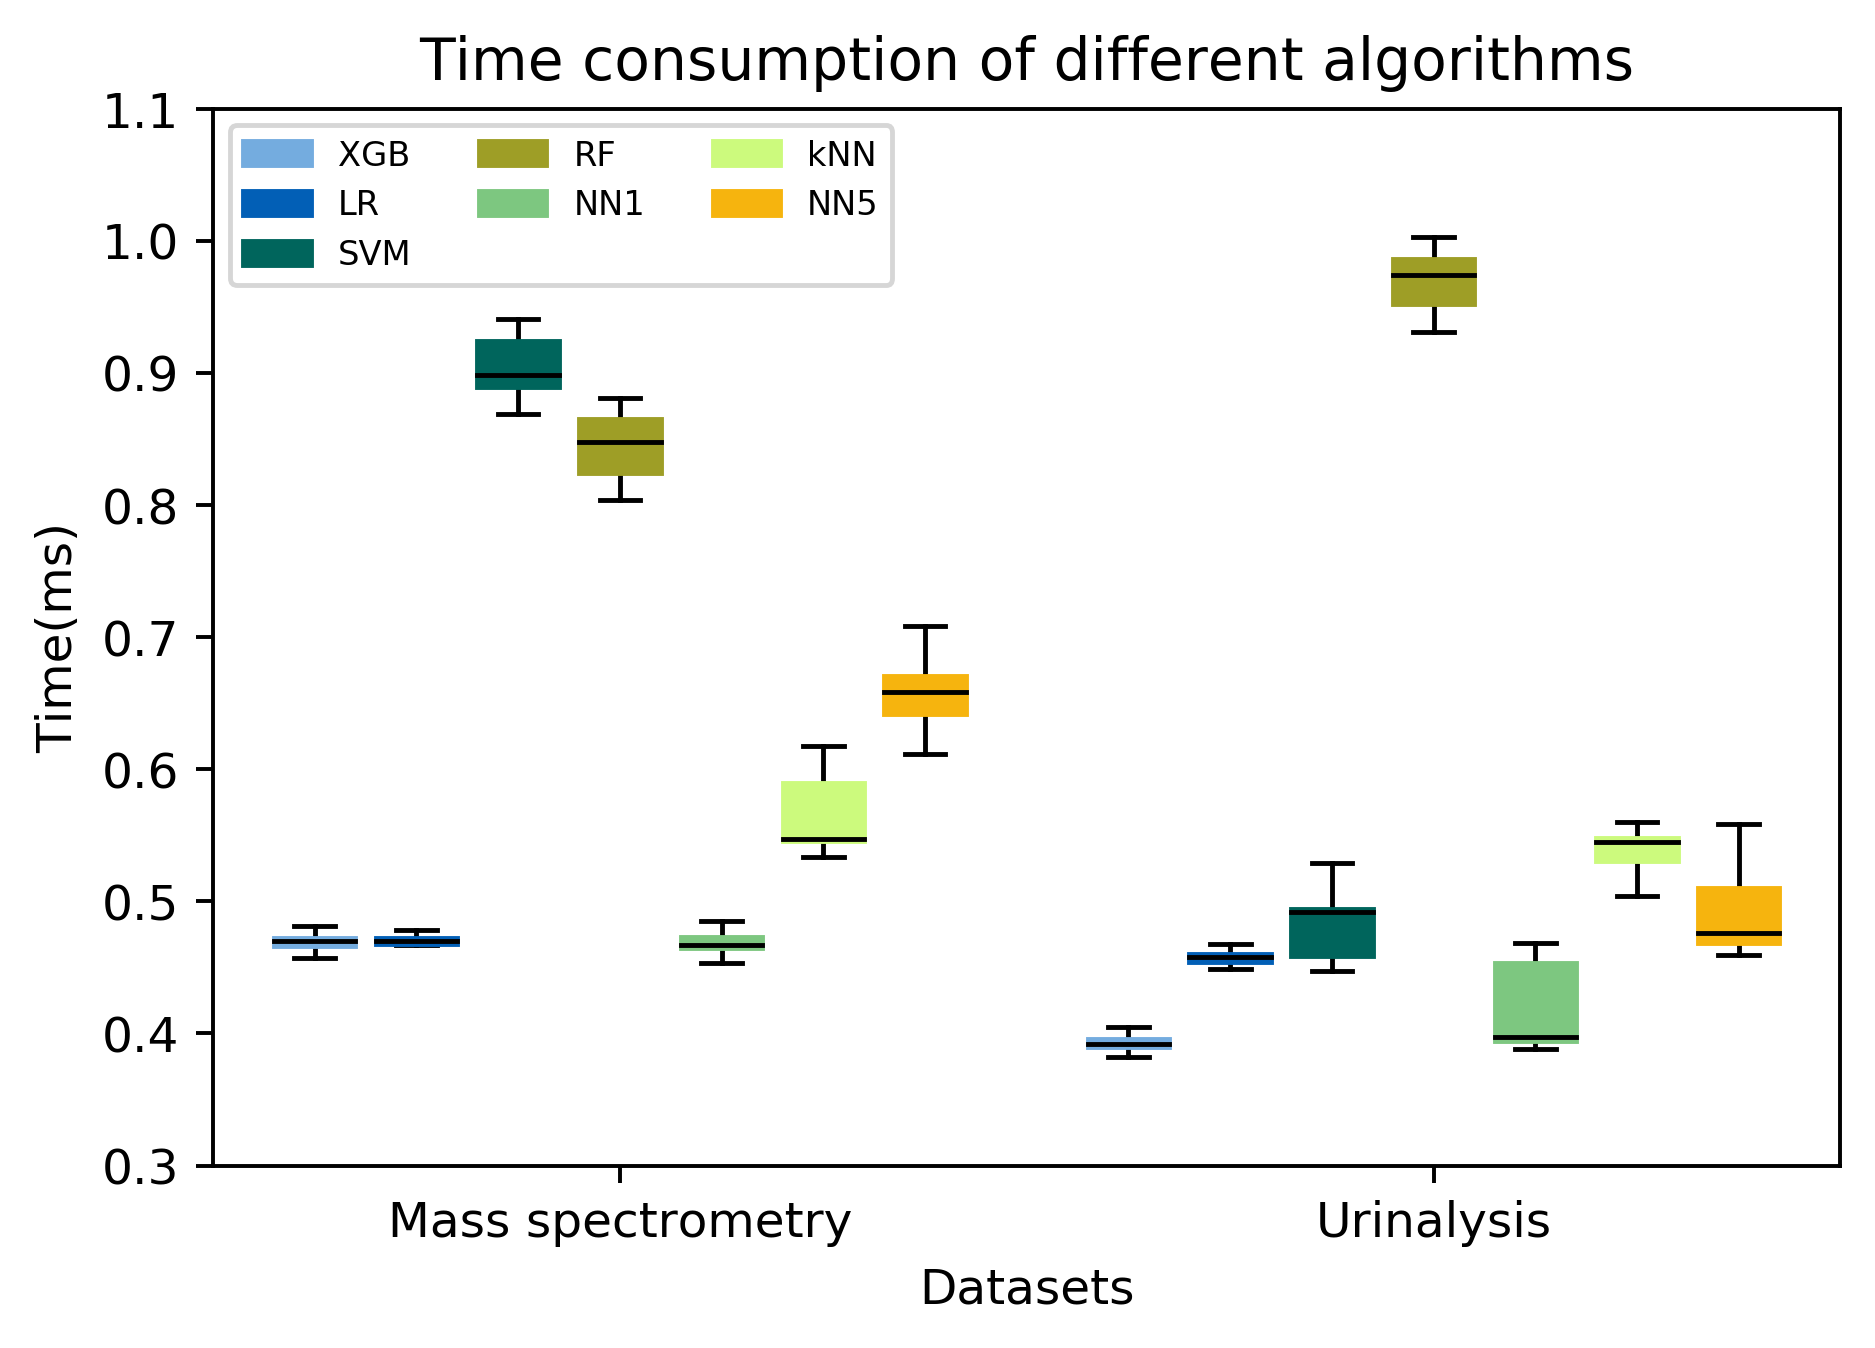

In [7]:
# color: color_series1_4
c = [(116/255,172/255,223/255,1),
     (2/255,95/255,182/255,1),
     (0/255,101/255,92/255,1),
     (158/255,158/255,38/255,1),
     (125/255,199/255,128/255,1),
     (204/255,250/255,125/255,1),
     (246/255,180/255,14/255,1),]

plt.figure(dpi=350)
leg_list = []
for i in range(7):
    # setting style for each algorithm
    capStyle_1 = {'color':'black'}
    boxStyle_1 = {'facecolor':c[i], 'color':c[i]}
    whiskerStyle_1 = {'color':'black','linewidth':1}
    medianStyle_1 = {'color':'black','linewidth':1}
    meanStyle_1 = dict(marker='s', markeredgecolor='black',
                          markerfacecolor='white')
    flierStyle_1 = dict(marker='o', markeredgecolor='black',
                          markerfacecolor='white')

    capStyle_2 = {'color':"black"}
    boxStyle_2 = {'facecolor':c[i], 'color':c[i]}
    whiskerStyle_2 = {'color':'black','linewidth':1}
    medianStyle_2 = {'color':'black','linewidth':1}
    meanStyle_2 = dict(marker='s', markeredgecolor='black',
                          markerfacecolor='white')
    flierStyle_2 = dict(marker='o', markeredgecolor='black',
                          markerfacecolor='white')
    
    
    bp = plt.boxplot(z[ algo_order_i[i] ][0],
                     positions = [i+1],
                     showmeans=0, #do not show mean
                     showfliers=True, 
                     sym = '',  #空字串代表不顯示fliers, 即便showfliers = True
                     widths =0.8,
                     patch_artist=True,
                     capprops=capStyle_1,
                     boxprops=boxStyle_1,
                     whiskerprops=whiskerStyle_1,
                     medianprops=medianStyle_1,
                     meanprops=meanStyle_1,
                     flierprops=flierStyle_1,)
    
    bp2 = plt.boxplot(z[ algo_order_i[i] ][1],
                     positions = [i+9],
                     showmeans=0, #do not show mean
                     widths = 0.8,
                     sym = '',
                     patch_artist=True,
                     capprops=capStyle_2,
                     boxprops=boxStyle_2,
                     whiskerprops=whiskerStyle_2,
                     medianprops=medianStyle_2,
                     meanprops=meanStyle_2,
                     showfliers=True,
                     flierprops=flierStyle_2,)
    
    # apply 'leg_list' for further legend setting
    leg_list.append(bp['boxes'][0])

    
    (_, q2M), (_,_) = bp['medians'][0].get_xydata()
    (_, q2T), (_,_) = bp2['medians'][0].get_xydata()

    (_, q1M), (_,minM) = bp['whiskers'][0].get_xydata()
    (_, q3M), (_,maxM) = bp['whiskers'][1].get_xydata()
    
    (_, q1T), (_,minT) = bp2['whiskers'][0].get_xydata()
    (_, q3T), (_,maxT) = bp2['whiskers'][1].get_xydata()
    print(f"{algo_order[i]} in MRSA: {round(q2M,5)} ({round(q1M,2)}-{round(q3M,2)})")
    print(f"{algo_order[i]} in Tri:  {round(q2T,5)} ({round(q1T,2)}-{round(q3T,2)})")
#     print(f"{algo_order[i]} in MRSA: min: {round(minM,2)} max: {round(maxM,2)}")
#     print(f"{algo_order[i]} in Tri:  min: {round(minT,2)} max: {round(maxT,2)}")
    
plt.xlabel('Datasets')
plt.ylabel('Time(ms)')
plt.axes().set_xlim([0,16])
plt.axes().set_ylim([0.3,1.1])
plt.axes().set_xticks([4,12])
plt.axes().set_xticklabels(['Mass spectrometry','Urinalysis'])
plt.axes().set_title('Time consumption of different algorithms')
plt.legend(leg_list, [algo_order[index] for index in range(7)], loc='upper left',ncol = 3, fontsize='x-small')
# plt.show()

plt.savefig('figure3.png', dpi=300, format = 'png')

# Power

 - MRSA

In [8]:
MRSA_power_pack = []
sheet_n = 2
for column_n in range(2,16,2):
    table = MRSA_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101) & (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    MRSA_power_pack.append(raw_data)

 - Trichomonas:

In [9]:
Tri_power_pack = []
sheet_n = 2
for column_n in range(2,16,2):
    table = Tri_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101)& (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
#     print(raw_data)
    Tri_power_pack.append(raw_data)

In [10]:
z_power = list( zip(MRSA_power_pack, Tri_power_pack) )

XGB in MRSA: 9.41848 (9.3-9.66)
XGB in Tri:  10.4278 (10.23-10.54)
LR in MRSA: 10.48049 (10.35-10.72)
LR in Tri:  9.98467 (9.87-10.14)
SVM in MRSA: 9.63335 (9.43-9.82)
SVM in Tri:  10.12805 (9.93-10.54)
RF in MRSA: 9.93403 (9.72-10.17)
RF in Tri:  10.32629 (10.17-10.52)
NN1 in MRSA: 11.33531 (11.16-11.5)
NN1 in Tri:  11.00711 (10.03-11.13)
kNN in MRSA: 12.54889 (11.99-12.69)
kNN in Tri:  11.41265 (11.18-11.69)
NN5 in MRSA: 13.86936 (13.54-14.3)
NN5 in Tri:  13.00727 (12.5-13.24)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

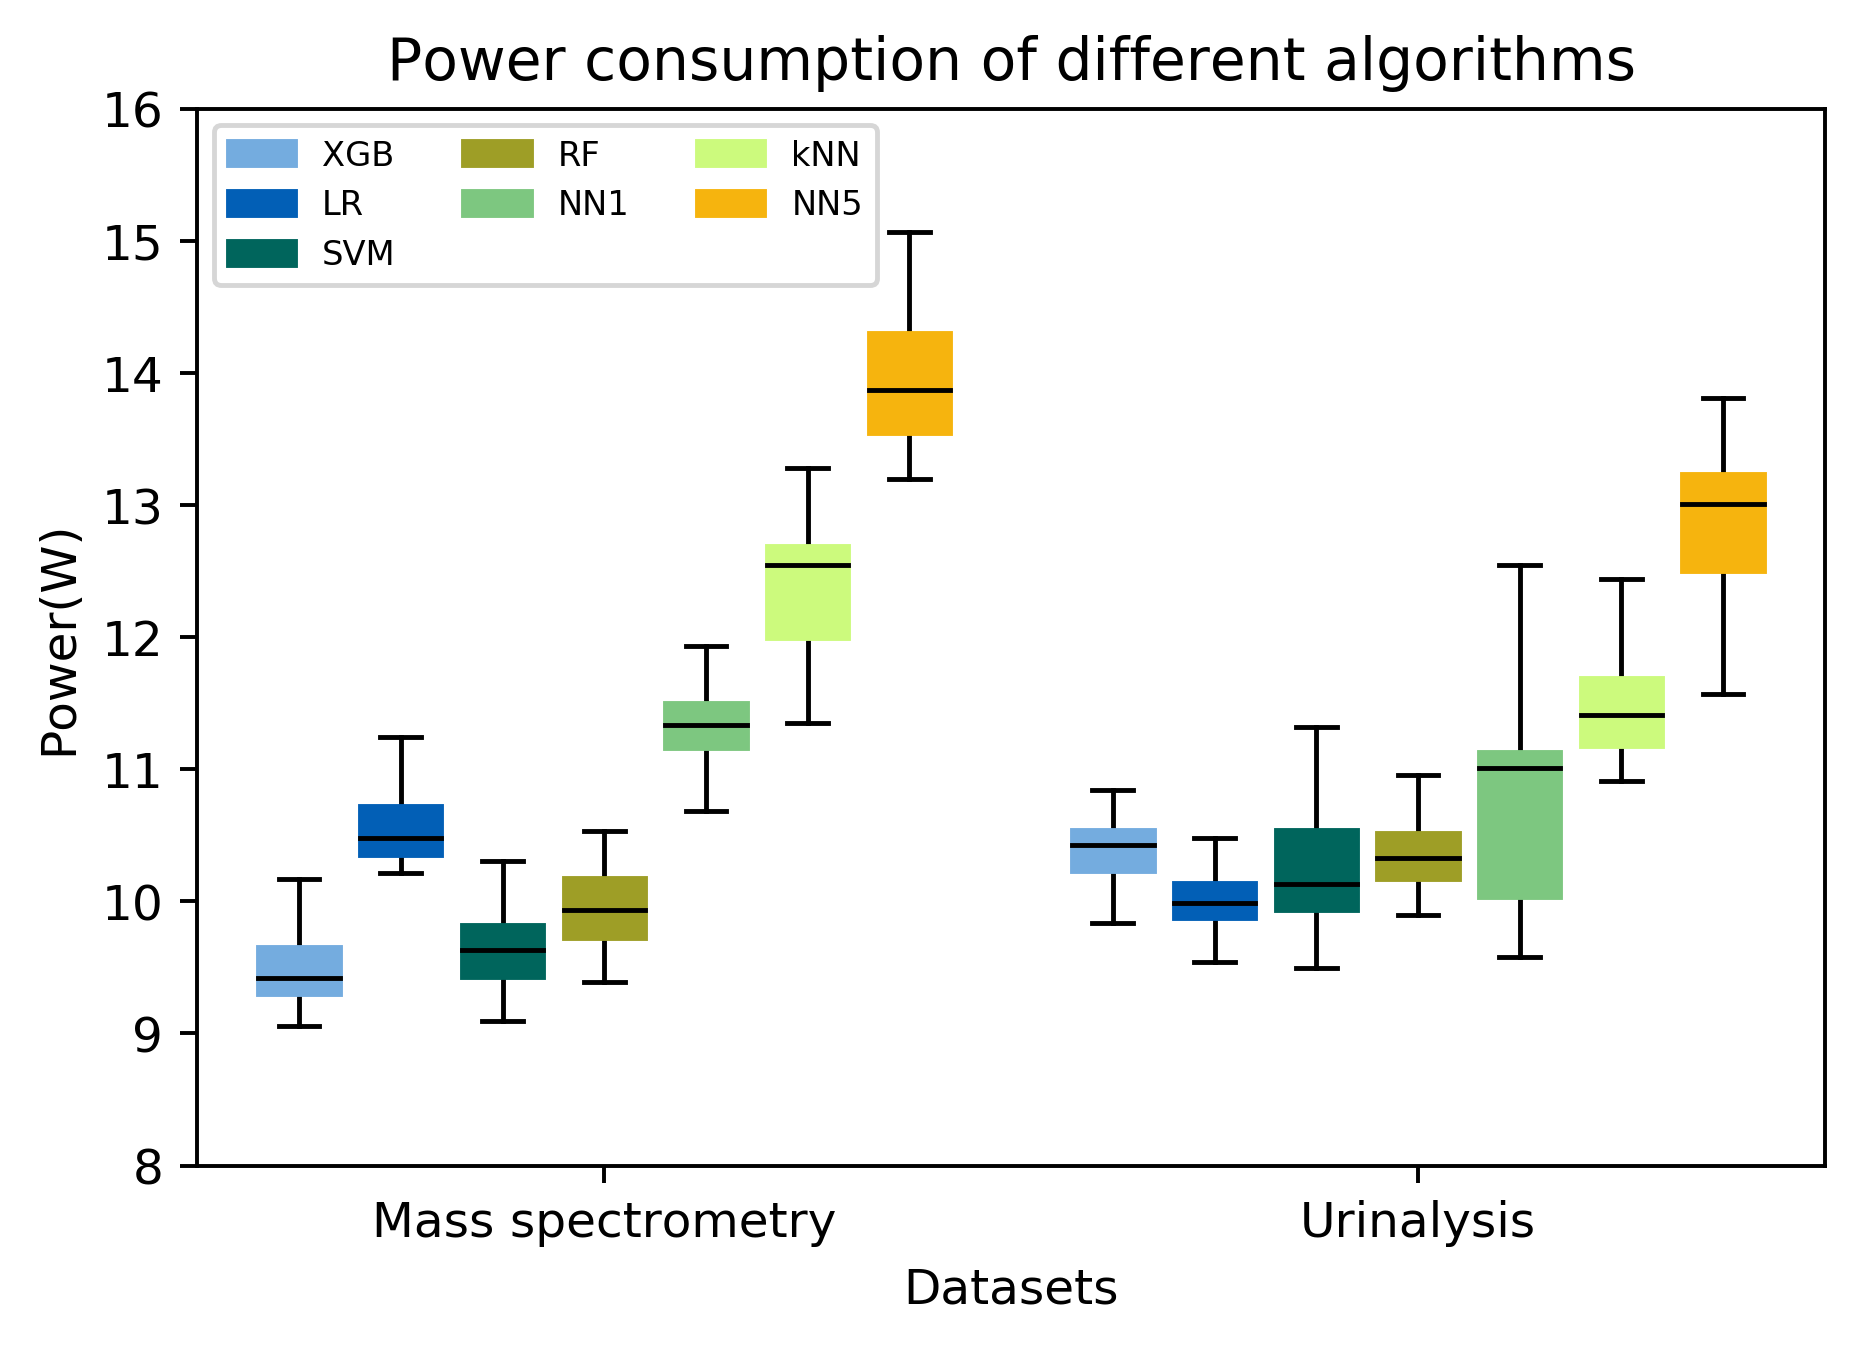

In [11]:
# color: color_series1_4
c = [(116/255,172/255,223/255,1),
     (2/255,95/255,182/255,1),
     (0/255,101/255,92/255,1),
     (158/255,158/255,38/255,1),
     (125/255,199/255,128/255,1),
     (204/255,250/255,125/255,1),
     (246/255,180/255,14/255,1),]

plt.figure(dpi=350)
leg_list = []
for i in range(7):
    # setting style for each algorithm
    capStyle_1 = {'color':'black'}
    boxStyle_1 = {'facecolor':c[i], 'color':c[i]}
    whiskerStyle_1 = {'color':'black','linewidth':1}
    medianStyle_1 = {'color':'black','linewidth':1}
    meanStyle_1 = dict(marker='s', markeredgecolor='black',
                          markerfacecolor='white')
    flierStyle_1 = dict(marker='o', markeredgecolor='black',
                          markerfacecolor='white')

    capStyle_2 = {'color':"black"}
    boxStyle_2 = {'facecolor':c[i], 'color':c[i]}
    whiskerStyle_2 = {'color':'black','linewidth':1}
    medianStyle_2 = {'color':'black','linewidth':1}
    meanStyle_2 = dict(marker='s', markeredgecolor='black',
                          markerfacecolor='white')
    flierStyle_2 = dict(marker='o', markeredgecolor='black',
                          markerfacecolor='white')
    
    
    bp = plt.boxplot(z_power[ algo_order_i[i] ][0],
                     positions = [i+1],
                     showmeans=0, #do not show mean
                     showfliers=True, 
                     sym = '',  #空字串代表不顯示fliers, 即便showfliers = True
                     widths =0.8,
                     patch_artist=True,
                     capprops=capStyle_1,
                     boxprops=boxStyle_1,
                     whiskerprops=whiskerStyle_1,
                     medianprops=medianStyle_1,
                     meanprops=meanStyle_1,
                     flierprops=flierStyle_1,)
    
    bp2 = plt.boxplot(z_power[ algo_order_i[i] ][1],
                     positions = [i+9],
                     showmeans=0, #do not show mean
                     widths = 0.8,
                     sym = '',
                     patch_artist=True,
                     capprops=capStyle_2,
                     boxprops=boxStyle_2,
                     whiskerprops=whiskerStyle_2,
                     medianprops=medianStyle_2,
                     meanprops=meanStyle_2,
                     showfliers=True,
                     flierprops=flierStyle_2,)
    
    # apply 'leg_list' for further legend setting
    leg_list.append(bp['boxes'][0])

    
    (_, q2M), (_,_) = bp['medians'][0].get_xydata()
    (_, q2T), (_,_) = bp2['medians'][0].get_xydata()

    (_, q1M), (_,minM) = bp['whiskers'][0].get_xydata()
    (_, q3M), (_,maxM) = bp['whiskers'][1].get_xydata()
    
    (_, q1T), (_,minT) = bp2['whiskers'][0].get_xydata()
    (_, q3T), (_,maxT) = bp2['whiskers'][1].get_xydata()
    print(f"{algo_order[i]} in MRSA: {round(q2M,5)} ({round(q1M,2)}-{round(q3M,2)})")
    print(f"{algo_order[i]} in Tri:  {round(q2T,5)} ({round(q1T,2)}-{round(q3T,2)})")
#     print(f"{algo_order[i]} in MRSA: min: {round(minM,2)} max: {round(maxM,2)}")
#     print(f"{algo_order[i]} in Tri:  min: {round(minT,2)} max: {round(maxT,2)}")
    
plt.xlabel('Datasets')
plt.ylabel('Power(W)')
plt.axes().set_title('Power consumption of different algorithms')
plt.axes().set_ylim([8,16])
plt.axes().set_xlim([0,16])
plt.axes().set_xticks([4,12])
plt.axes().set_xticklabels(['Mass spectrometry','Urinalysis'])
plt.legend(leg_list, [algo_order[index] for index in range(7)], loc='upper left',ncol = 3, fontsize='x-small')
# plt.show()

plt.savefig('figure4.png', dpi=300, format = 'png')

# energy

 - MRSA

In [14]:
MRSA_energy_pack = []
sheet_n = 3
for column_n in range(2,16,2):
    table = MRSA_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101) & (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
    print(raw_data)
    MRSA_energy_pack.append(raw_data)

[7.643769736842105, 7.670352631578948, 7.40300197368421, 6.74458552631579, 7.469779605263158, 8.349127631578947, 7.34497894736842, 7.379431578947368, 7.5155559210526315, 7.878674999999999, 7.551655263157895, 9.389536184210526, 7.335622368421052, 7.522623026315789, 7.3851335526315784, 7.634173026315789, 7.399147368421052, 7.306550657894737, 7.366140131578947, 7.512865789473684, 7.346785526315789, 7.470663157894737, 7.476083552631579, 7.549246052631579, 7.496763815789473, 7.328675657894737, 7.471385526315789, 7.3466651315789475, 7.368991447368422, 7.563019078947368, 7.339156578947369, 7.607630921052632, 7.668224342105264, 7.319319736842105, 7.421071710526316, 7.334578947368421, 7.422075657894737, 7.449180263157895, 7.412559210526315, 7.386057236842106, 7.384571052631579, 7.305867763157895, 7.374010526315789, 7.472469736842106, 7.55028947368421, 7.38143947368421, 7.3887875, 7.657784210526316, 7.5926124999999995, 7.552980263157894, 7.499494078947369, 7.674970394736842, 7.568961842105264, 7

 - Trichomonas

In [15]:
Tri_energy_pack = []
sheet_n = 3
for column_n in range(2,16,2):
    table = Tri_data.sheet_by_index(sheet_n)
    row_n = 10
    raw_data = []
    while(len(raw_data) < 101)& (row_n < 110):
        if type( table.cell(row_n,4).value ) == float:
            raw_data.append( table.cell(row_n,column_n).value )
        row_n = row_n +1
        
    print(raw_data)
    Tri_energy_pack.append(raw_data)

[6.921386842105263, 6.987079605263158, 6.796867105263158, 6.8055802631578945, 6.752375657894736, 6.680659210526316, 6.93503947368421, 6.227713815789474, 6.917009868421053, 6.793213157894737, 6.822847368421052, 6.826782236842105, 6.752656578947368, 6.918615789473685, 7.222305921052631, 7.162234868421052, 6.876172368421052, 7.012055921052632, 6.999367105263158, 6.842442763157894, 7.205441447368421, 6.900546710526315, 6.894884868421053, 6.9060875, 7.074857894736842, 6.7094499999999995, 6.905967105263159, 7.066104605263158, 6.816382236842105, 6.842683552631579, 7.0066749999999995, 6.934838815789473, 7.205079605263157, 6.9174513157894735, 7.115334210526315, 6.8129690789473685, 6.8554125, 6.951944736842105, 6.888700657894736, 6.787390131578948, 7.127380263157894, 7.002419078947368, 6.990934868421052, 6.820076315789474, 6.795863157894737, 6.995552631578947, 6.8917125, 6.962465131578948, 6.787711842105264, 6.799999342105263, 6.860913815789474, 6.7728947368421055, 6.77546447368421, 6.9308230263

In [16]:
z_energy = list( zip(MRSA_energy_pack, Tri_energy_pack) )

XGB in MRSA: 6.71 (6.63-6.8) XGB in Tri:  6.23 (6.18-6.27)
LR in MRSA: 7.47 (7.39-7.56) LR in Tri:  6.91 (6.84-7.0)
SVM in MRSA: 13.15 (13.03-13.35) SVM in Tri:  7.47 (7.36-7.56)
RF in MRSA: 12.75 (12.61-12.85) RF in Tri:  15.18 (15.04-15.35)
NN1 in MRSA: 8.05 (7.95-8.23) NN1 in Tri:  6.71 (6.61-6.85)
kNN in MRSA: 10.52 (10.43-10.69) kNN in Tri:  9.34 (9.25-9.52)
NN5 in MRSA: 13.79 (13.66-14.0) NN5 in Tri:  9.44 (9.28-9.67)


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

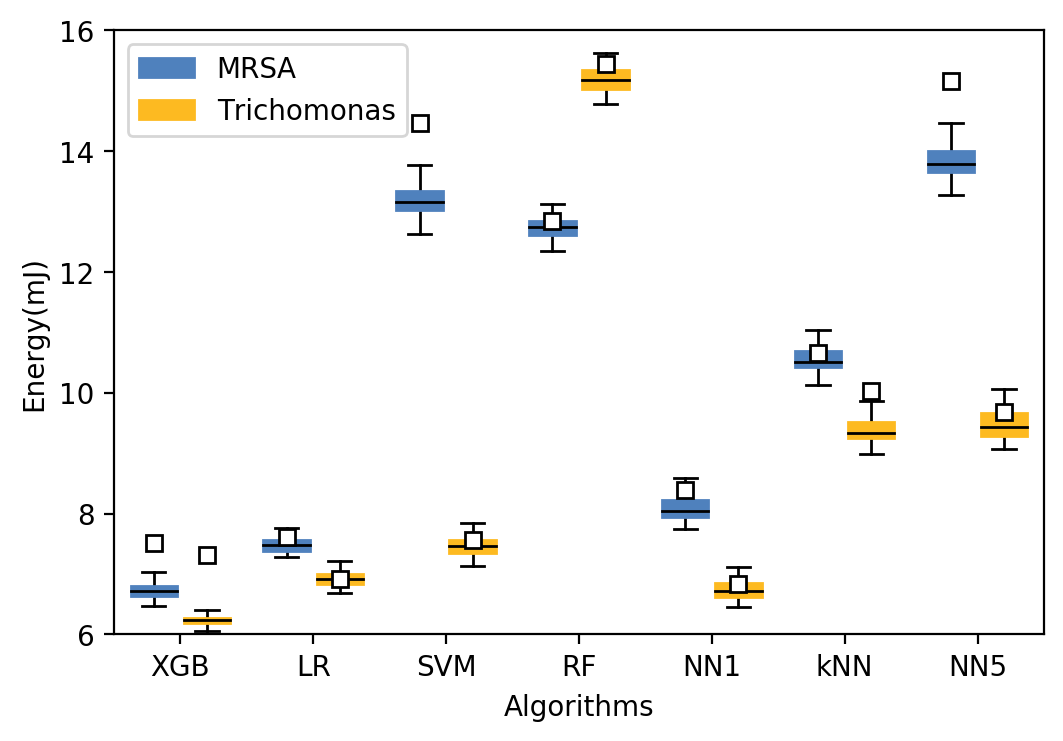

In [17]:
yolk = (253/255,186/255,33/255,1)
bar_blue = (79/255,129/255,189/255,1)
dark_red = (192/255,80/255,77/255,1)
yolk_t = (253/255,186/255,33/255,0.5)
bar_blue_t = (79/255,129/255,189/255,0.5)

c1 = bar_blue
c1t = bar_blue_t
c2 = yolk
c2t = yolk_t

capStyle_1 = {'color':'black'}
boxStyle_1 = {'facecolor':c1, 'color':c1}
whiskerStyle_1 = {'color':'black','linewidth':1}
medianStyle_1 = {'color':'black','linewidth':1}
meanStyle_1 = dict(marker='s', markeredgecolor='black',
                      markerfacecolor='white')

capStyle_2 = {'color':"black"}
boxStyle_2 = {'facecolor':c2, 'color':c2}
whiskerStyle_2 = {'color':'black','linewidth':1}
medianStyle_2 = {'color':'black','linewidth':1}
meanStyle_2 = dict(marker='s', markeredgecolor='black',
                      markerfacecolor='white')

plt.figure(dpi=200)
for i in range(7):
    bp = plt.boxplot(z_energy[ algo_order_i[i] ][0],
                     positions = [2*i+0.6],
#                      positions = [2.4*i],
                     showmeans=True,
                     sym = '',
                     widths =0.7,
                     patch_artist=True,
                     capprops=capStyle_1,
                     boxprops=boxStyle_1,
                     whiskerprops=whiskerStyle_1,
                     medianprops=medianStyle_1,
                     meanprops=meanStyle_1)
    
    bp2 = plt.boxplot(z_energy[ algo_order_i[i] ][1],
                     positions = [2*i+1.4],
#                      positions = [2.4*i+1],
                     showmeans=True,
                     widths = 0.7,
                     sym = '',
                     patch_artist=True,
                     capprops=capStyle_2,
                     boxprops=boxStyle_2,
                     whiskerprops=whiskerStyle_2,
                     medianprops=medianStyle_2,
                     meanprops=meanStyle_2)

    (_, q2M), (_,_) = bp['medians'][0].get_xydata()
    (_, q2T), (_,_) = bp2['medians'][0].get_xydata()

    (_, q1M), (_,_) = bp['whiskers'][0].get_xydata()
    (_, q3M), (_,_) = bp['whiskers'][1].get_xydata()
    
    (_, q1T), (_,_) = bp2['whiskers'][0].get_xydata()
    (_, q3T), (_,_) = bp2['whiskers'][1].get_xydata()
    print(f"{algo_order[i]} in MRSA: {round(q2M,2)} ({round(q1M,2)}-{round(q3M,2)})", end = ' ')
    print(f"{algo_order[i]} in Tri:  {round(q2T,2)} ({round(q1T,2)}-{round(q3T,2)})")
plt.xlabel('Algorithms')
plt.ylabel('Energy(mJ)')
plt.axes().set_xlim([0,14])
plt.axes().set_ylim([6,16])
plt.axes().set_xticks([2*i+1 for i in range(7)])
plt.axes().set_xticklabels(algo_order)
plt.legend([bp["boxes"][0], bp2["boxes"][0]], ['MRSA', 'Trichomonas'], loc='upper left')

plt.show()